# Assignment 2 : Data Analysis and visualisation

1. import the library and load the dataset
    import seaborn as sns
    data = sns.load_dataset("titanic")

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### data = sns.load_dataset("titanic")

In [2]:
data = sns.load_dataset("titanic")

In [3]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
data.shape

(891, 15)

In [5]:
data.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [6]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# 2. Deal with Missing values, Outliers and remove unwanted columns


In [7]:
data.drop("deck",axis=1 ,inplace=True)

In [8]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

##### reset index

In [9]:
data.reset_index(drop=False,inplace = True)

##### finding the null vales in embarked

In [10]:
mv=data[data["embarked"].isnull()].index.tolist()

##### droping values

In [11]:
data.drop(mv, axis=0, inplace=True)

In [12]:
data.isnull().any()

index          False
survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked       False
class          False
who            False
adult_male     False
embark_town    False
alive          False
alone          False
dtype: bool

In [13]:
data.reset_index(drop=False,inplace = True)

In [14]:
data

,level_0,index,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,886,886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
885,887,887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
886,888,888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
887,889,889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


# fill 

In [15]:
data["age"].median()

28.0

In [16]:
np.set_printoptions

<function numpy.set_printoptions(precision=None, threshold=None, edgeitems=None, linewidth=None, suppress=None, nanstr=None, infstr=None, formatter=None, sign=None, floatmode=None, *, legacy=None)>

In [17]:
data["age"].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [18]:
data["age"].median()

28.0

###### fill missing data with median of age

In [19]:
data.fillna(data.median(), inplace= True)

C:\Users\NIBASN~1\AppData\Local\Temp/ipykernel_5992/2002372947.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.median(), inplace= True)


In [20]:
data.isnull().any()

level_0        False
index          False
survived       False
pclass         False
sex            False
age            False
sibsp          False
parch          False
fare           False
embarked       False
class          False
who            False
adult_male     False
embark_town    False
alive          False
alone          False
dtype: bool

# Outliner Analysis

### Age

C:\Users\Nibas Nazeem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

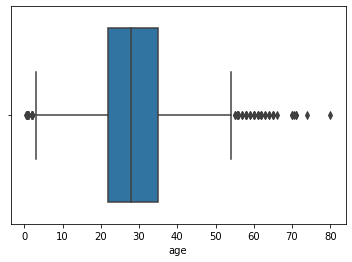

In [21]:
sns.boxplot(data["age"])

In [22]:
q1=data["age"].describe()["25%"]
q3=data["age"].describe()["75%"]

In [23]:
iqr=q3-q1
l_b=q1 -(1.5 *iqr)
u_b=q3 +(1.5*iqr)

In [24]:
print(l_b)
print(u_b)

2.5
54.5


In [25]:
(data[data["age"]<l_b].shape[0]/data["age"].shape[0])*100

2.699662542182227

In [26]:
(data[data["age"]>u_b].shape[0]/data["age"].shape[0])*100

4.611923509561304

###### only removing upperlimit because its above 2

In [27]:
data.drop(data[data["age"]<l_b].index, axis=0, inplace=True)

### Fare

C:\Users\Nibas Nazeem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

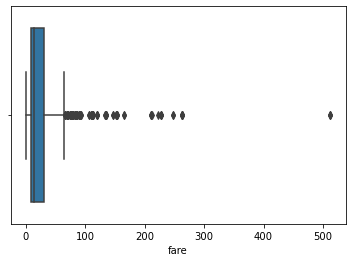

In [28]:
sns.boxplot(data["fare"])

In [29]:
data["fare"].describe()

count    865.000000
mean      32.008915
std       50.011140
min        0.000000
25%        7.895800
50%       14.000000
75%       30.695800
max      512.329200
Name: fare, dtype: float64

In [30]:
q1=data["fare"].describe()["25%"]
q3=data["fare"].describe()["75%"]

In [31]:
iqr_fare=q3-q1
l_b=q1 -(1.5 *iqr_fare)
u_b=q3 +(1.5*iqr_fare)
print(l_b)
print(u_b)

-26.304199999999994
64.8958


In [32]:
(data[data["fare"]>u_b].shape[0]/data["fare"].shape[0])*100

13.179190751445086

### no need to drop becoz above 5

In [33]:
(data[data["fare"]<l_b].shape[0]/data["fare"].shape[0])*100

0.0

In [34]:
data[data["fare"]<l_b]

,level_0,index,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone


In [35]:
data[data["fare"]>u_b]

,level_0,index,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
27,27,27,0,1,male,19.0,3,2,263.0000,S,First,man,True,Southampton,no,False
31,31,31,1,1,female,28.0,1,0,146.5208,C,First,woman,False,Cherbourg,yes,False
34,34,34,0,1,male,28.0,1,0,82.1708,C,First,man,True,Cherbourg,no,False
52,52,52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,846,846,0,3,male,28.0,8,2,69.5500,S,Third,man,True,Southampton,no,False
847,849,849,1,1,female,28.0,1,0,89.1042,C,First,woman,False,Cherbourg,yes,False
854,856,856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,Southampton,yes,False
861,863,863,0,3,female,28.0,8,2,69.5500,S,Third,woman,False,Southampton,no,False


# sibsp

C:\Users\Nibas Nazeem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sibsp'>

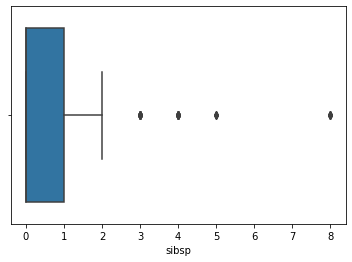

In [36]:
sns.boxplot(data["sibsp"])

In [37]:
data["sibsp"].describe()

count    865.000000
mean       0.491329
std        1.070536
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: sibsp, dtype: float64

In [38]:
q1=data["sibsp"].describe()["25%"]
q3=data["sibsp"].describe()["75%"]

In [39]:
iqr_sibsp=q3-q1
l_b=q1 -(1.5 *iqr_sibsp)
u_b=q3 +(1.5*iqr_sibsp)
print(l_b)
print(u_b)

-1.5
2.5


In [40]:
(data[data["sibsp"]>u_b].shape[0]/data["sibsp"].shape[0])*100

4.508670520231214

In [41]:
(data[data["sibsp"]<l_b].shape[0]/data["sibsp"].shape[0])*100

0.0

# 3.Perform exploratory Data analysis
   1.Perform Descriptive statistics
   2.Do Data visualisation using seaborn and matplotlib(10-15 visualizations)


### Count of people from each town

In [42]:
gdata=data["embark_town"].value_counts()

In [43]:
gdata.index

Index(['Southampton', 'Cherbourg', 'Queenstown'], dtype='object')

In [44]:
gdata.values

array([626, 163,  76], dtype=int64)

Text(0.5, 1.0, 'Count of people from each town')

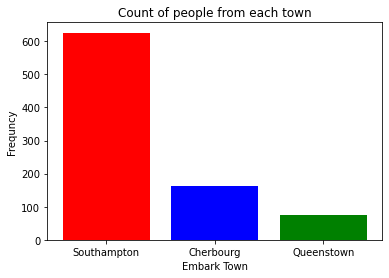

In [45]:
plt.bar(gdata.index,gdata.values,color=["red","blue","green"])
plt.xlabel("Embark Town")
plt.ylabel("Frequncy")
plt.title("Count of people from each town")

### Count diffrence between male and female passengers

In [46]:
gdata=data["sex"].value_counts()

In [47]:
gdata.values

array([563, 302], dtype=int64)

In [48]:
gdata.index

Index(['male', 'female'], dtype='object')

Text(0.5, 1.0, 'Count diffrence between male and female passengers')

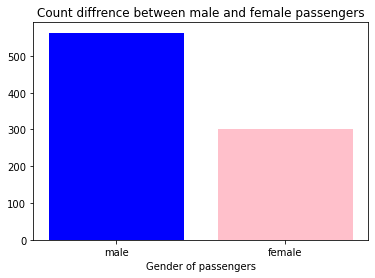

In [49]:
plt.bar(gdata.index,gdata.values,color=["blue","pink"])
plt.xlabel("Gender of passengers")
plt.title("Count diffrence between male and female passengers")

### Representation of alive people

In [50]:
gdata=data["alive"].value_counts()

In [51]:
gdata.values

array([540, 325], dtype=int64)

In [54]:
gdata.index

Index(['no', 'yes'], dtype='object')

Text(0.5, 1.0, 'Representation of alive people')

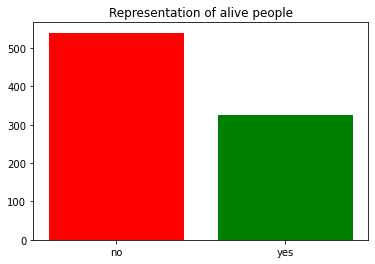

In [55]:
plt.bar(gdata.index,gdata.values,color=["red","green"])
plt.title("Representation of alive people")

### The count of classes 

In [57]:
gdata=data["class"].value_counts()

In [59]:
gdata.index

CategoricalIndex(['Third', 'First', 'Second'], categories=['First', 'Second', 'Third'], ordered=False, dtype='category')

In [60]:
gdata.values

array([476, 212, 177], dtype=int64)

Text(0.5, 1.0, 'The count of classes')

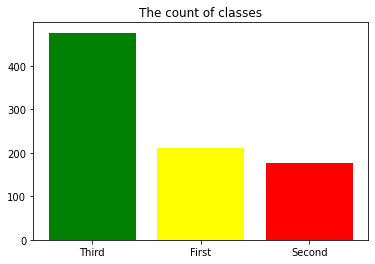

In [63]:
plt.bar(gdata.index,gdata.values,color=["green","yellow","red"])
plt.title("The count of classes")

### age by class

In [73]:
gdata=data["age"].value_counts()

In [74]:
gdata.index

Float64Index([28.0, 24.0, 22.0, 18.0, 30.0, 19.0, 21.0, 25.0, 36.0, 29.0, 27.0,
              32.0, 35.0, 26.0, 16.0, 31.0, 33.0, 34.0, 23.0, 20.0, 39.0, 40.0,
              42.0, 17.0, 45.0, 38.0,  4.0, 50.0, 47.0, 44.0, 48.0,  9.0, 54.0,
              51.0, 49.0, 52.0,  3.0, 41.0, 14.0, 37.0, 58.0, 43.0, 15.0, 56.0,
              11.0,  5.0,  8.0, 60.0, 62.0, 61.0,  6.0, 46.0, 65.0,  7.0, 71.0,
              13.0, 64.0, 10.0, 40.5, 63.0, 28.5, 59.0, 70.0, 45.5, 55.0, 32.5,
              30.5, 57.0, 53.0, 80.0, 24.5, 34.5, 55.5, 66.0, 23.5, 20.5, 14.5,
              70.5, 12.0, 36.5, 74.0],
             dtype='float64')

In [85]:
gdata.values

array([202,  30,  27,  26,  25,  25,  24,  23,  22,  20,  18,  18,  18,
        18,  17,  17,  15,  15,  15,  15,  14,  13,  13,  13,  12,  10,
        10,  10,   9,   9,   9,   8,   8,   7,   6,   6,   6,   6,   6,
         6,   5,   5,   5,   4,   4,   4,   4,   4,   3,   3,   3,   3,
         3,   3,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1], dtype=int64)

Text(0, 0.5, 'Class')

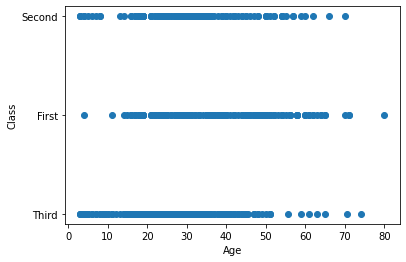

In [111]:
plt.scatter(data=data,x='age',y='class')
plt.xlabel("Age")
plt.ylabel("Class")

#### survived

In [97]:
gdata=data["survived"].value_counts()

In [106]:
gdata.values

array([540, 325], dtype=int64)

In [129]:
gdata.index

Index(['male', 'female'], dtype='object')

<BarContainer object of 2 artists>

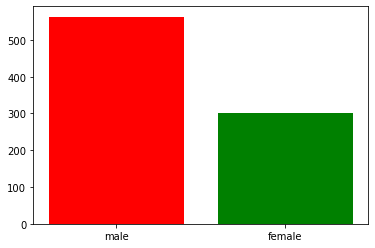

In [130]:
plt.bar(gdata.index,gdata.values,color=["red","green"])


### alive

In [98]:
gdata=data["alive"].value_counts()

In [99]:
gdata.values

array([540, 325], dtype=int64)

In [100]:
gdata.index

Index(['no', 'yes'], dtype='object')

<BarContainer object of 2 artists>

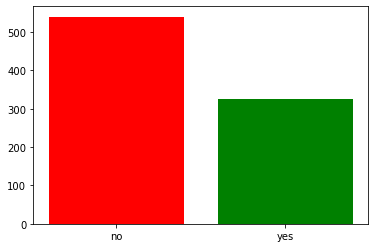

In [101]:
plt.bar(gdata.index,gdata.values,color=["red","green"])


### class by fare

Text(0.5, 1.0, 'Cost of Ticket')

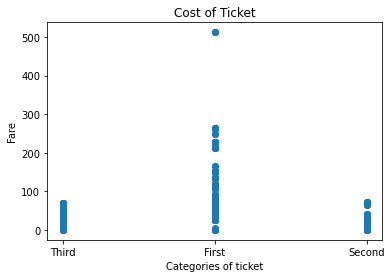

In [107]:
plt.scatter(data=data,x='class',y='fare')
plt.xlabel("Categories of ticket")
plt.ylabel("Fare")
plt.title("Cost of Ticket")

### age by embark town

Text(0.5, 1.0, 'Cost of Ticket')

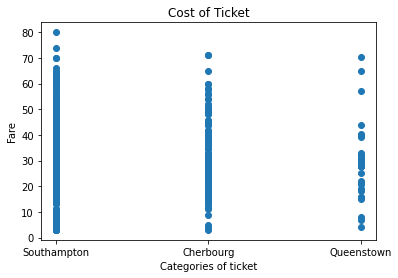

In [115]:
plt.scatter(data=data,x='embark_town',y='age')
plt.xlabel("Categories of ticket")
plt.ylabel("Fare")
plt.title("Cost of Ticket")

#### alive by town

Text(0.5, 1.0, 'Cost of Ticket')

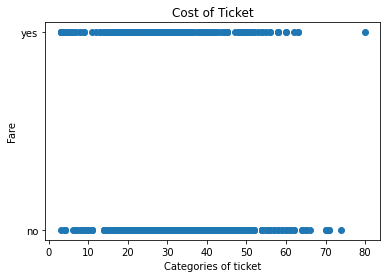

In [123]:
plt.scatter(data=data,x='age',y='alive')
plt.xlabel("Categories of ticket")
plt.ylabel("Fare")
plt.title("Cost of Ticket")

### Pie Chart

In [56]:
gdata=data["embark_town"].value_counts()

In [58]:
gdata.values

array([626, 163,  76], dtype=int64)

In [59]:
gdata.index

Index(['Southampton', 'Cherbourg', 'Queenstown'], dtype='object')

In [61]:
len(gdata.sort_values(ascending=False))

3

In [62]:
explode=np.zeros(len(gdata))

In [63]:
explode

array([0., 0., 0.])

In [65]:
gdata=gdata.sample(frac = 1)

([<matplotlib.patches.Wedge at 0x1e971d486a0>,
 [Text(-0.7109693490694791, 0.8393584363570318, 'Southampton'),
  Text(0.12160135755326976, -1.0932580252809498, 'Queenstown'),
  Text(0.9128093162523038, -0.6138233884131509, 'Cherbourg')],
 [Text(-0.4524350403169411, 0.5341371867726565, '72.4'),
  Text(0.07738268207935346, -0.6957096524515134, '8.8'),
  Text(0.5808786557969204, -0.3906148835356414, '18.8')])

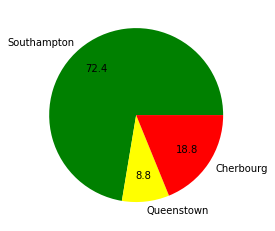

In [67]:
plt.pie(gdata.values,labels=gdata.index, autopct ="%.1f", colors=["green","yellow","red"],explode= explode ,pctdistance =0.7)

### couunt of clasess

In [69]:
gdata=data["class"].value_counts()

In [70]:
gdata.values

array([476, 212, 177], dtype=int64)

In [71]:
gdata.index

CategoricalIndex(['Third', 'First', 'Second'], categories=['First', 'Second', 'Third'], ordered=False, dtype='category')

In [72]:
len(gdata.sort_values(ascending=False))

3

In [73]:
explode=np.zeros(len(gdata))

In [74]:
explode

array([0., 0., 0.])

In [75]:
gdata=gdata.sample(frac = 1)

([<matplotlib.patches.Wedge at 0x1e971df92b0>,
 [Text(-0.1730643758947103, 1.086300474912984, 'Third'),
  Text(-0.6319335407265625, -0.900366592063916, 'Second'),
  Text(0.7897304655932094, -0.7657191336997744, 'First')],
 [Text(-0.11013187556936108, 0.6912821203991716, '55.0'),
  Text(-0.40213952591690333, -0.5729605585861283, '20.5'),
  Text(0.5025557508320422, -0.4872758123544018, '24.5')])

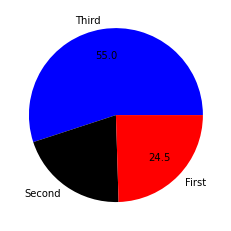

In [77]:
plt.pie(gdata.values,labels=gdata.index, autopct ="%.1f", colors=["blue","black","red"],explode= explode ,pctdistance =0.7)

### alive

In [78]:
gdata=data["alive"].value_counts()

In [79]:
gdata.values

array([540, 325], dtype=int64)

In [80]:
gdata.index

Index(['no', 'yes'], dtype='object')

In [81]:
len(gdata.sort_values(ascending=False))

2

In [82]:
explode=np.zeros(len(gdata))

In [83]:
explode

array([0., 0.])

In [84]:
gdata=gdata.sample(frac = 1)

([<matplotlib.patches.Wedge at 0x1e971e42be0>,
 [Text(-0.41864388067513814, 1.0172203798456168, 'no'),
  Text(0.41864397591418107, -1.0172203406493436, 'yes')],
 [Text(-0.2664097422478151, 0.6473220599017561, '62.4'),
  Text(0.2664098028544788, -0.6473220349586731, '37.6')])

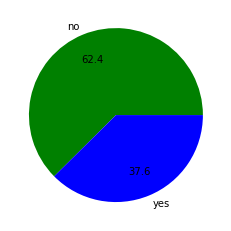

In [85]:
plt.pie(gdata.values,labels=gdata.index, autopct ="%.1f", colors=["green","blue"],explode= explode ,pctdistance =0.7)

### gender

In [86]:
gdata=data["sex"].value_counts()

In [87]:
gdata.values

array([563, 302], dtype=int64)

In [88]:
gdata.index

Index(['male', 'female'], dtype='object')

In [89]:
len(gdata.sort_values(ascending=False))

2

In [90]:
explode=np.zeros(len(gdata))

In [91]:
explode

array([0., 0.])

In [92]:
gdata=gdata.sample(frac = 1)

([<matplotlib.patches.Wedge at 0x1e971ee26a0>,
 [Text(0.502057409635509, 0.9787432540917372, 'female'),
  Text(-0.5020574096355089, -0.9787432540917372, 'male')],
 [Text(0.3194910788589602, 0.6228366162401964, '34.9'),
  Text(-0.31949107885896016, -0.6228366162401964, '65.1')])

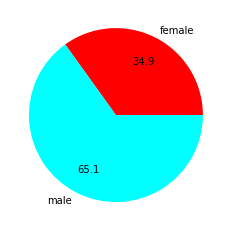

In [94]:
plt.pie(gdata.values,labels=gdata.index, autopct ="%.1f", colors=["red","cyan"],explode= explode ,pctdistance =0.7)

### Alone

In [95]:
gdata=data["alone"].value_counts()

In [96]:
gdata.values

array([535, 330], dtype=int64)

In [97]:
gdata.index

Index([True, False], dtype='object')

In [98]:
len(gdata.sort_values(ascending=False))

2

In [99]:
explode=np.zeros(len(gdata))

In [100]:
explode

array([0., 0.])

In [101]:
gdata=gdata.sample(frac = 1)

([<matplotlib.patches.Wedge at 0x1e971f2bdc0>,
 [Text(-0.400103686175641, 1.0246545956119382, 'True'),
  Text(0.40010378211072595, -1.0246545581515232, 'False')],
 [Text(-0.2546114366572261, 0.6520529244803241, '61.8'),
  Text(0.25461149770682556, -0.6520529006418783, '38.2')])

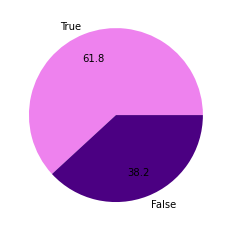

In [102]:
plt.pie(gdata.values,labels=gdata.index, autopct ="%.1f", colors=["violet","indigo",],explode= explode ,pctdistance =0.7)